## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings   
warnings.filterwarnings("ignore")  # 향후 버전에서 제외될 수 있다는 경고 메시지 감추기

### **나.  학습데이터 불러오기**

In [ ]:
df = pd.read_csv('train_dataset.csv', delimiter=',')

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,0.0,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,0.0,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,0.0,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,0.0,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [ ]:
df.describe()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
count,3664.000000,3664.000000,3664.000000,3663.000000,3663.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0
mean,1831.500000,54.559225,0.412937,29.365820,20.383292,20.330513,2.516921,0.272653,4.707697,0.104258,0.060862,4.228568,0.0,0.002183,0.220797,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.0
std,1057.850021,82.493265,0.847058,78.595248,9.597012,9.628093,1.534119,1.124592,25.318285,0.574310,0.239110,0.393055,0.0,0.046682,0.898383,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.0
min,0.000000,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.737839,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,915.750000,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.983196,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0
50%,1831.500000,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.189561,0.0,0.000000,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0
75%,2747.250000,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.458940,0.0,0.000000,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0
max,3663.000000,1837.000000,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,1.000000,5.821782,0.0,1.000000,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0


In [ ]:
# 범주형 : url_ip_present(URL내 IP표시 여부), url_chinese_present(URL내 중국어 표기 여부), url_port(URL내 포트 표기 여부), Result_v1(악성사이트 여부 컬럼)

In [ ]:
df.shape

(3664, 25)

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

<AxesSubplot:>

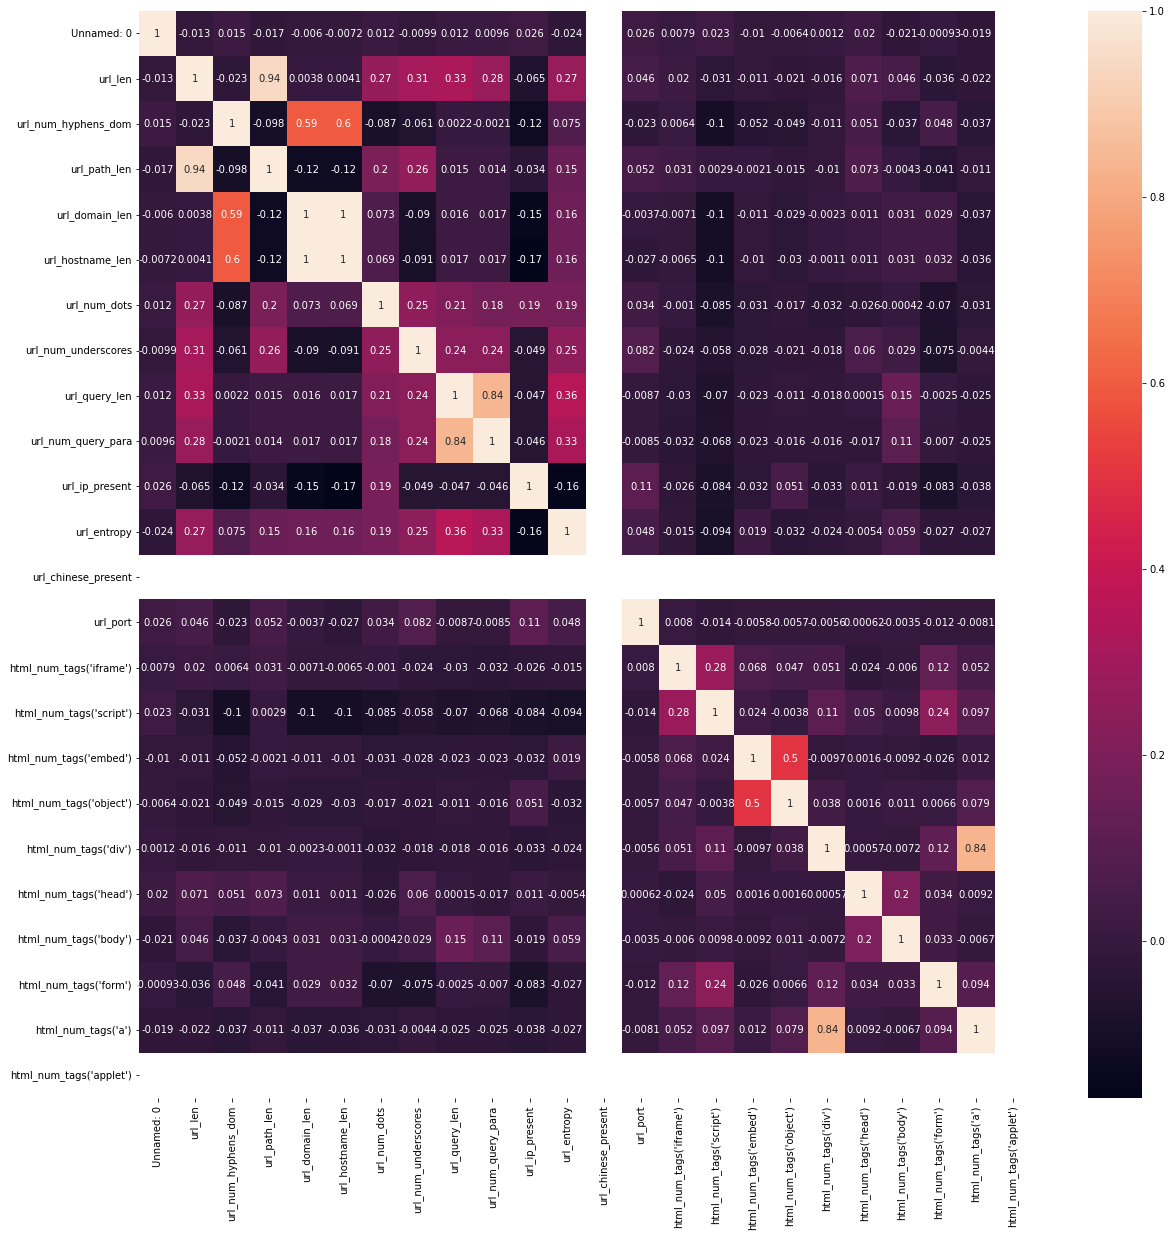

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
Unnamed: 0,1.000000,-0.013179,0.014539,-0.016766,-0.006046,-0.007236,0.011837,-0.009860,0.012145,0.009634,0.026319,-0.024342,NaN,0.026392,0.007858,0.023067,-0.010319,-0.006419,0.001246,0.020276,-0.021239,-0.000935,-0.018806,NaN
url_len,-0.013179,1.000000,-0.022953,0.943058,0.003787,0.004117,0.265846,0.313610,0.325916,0.275240,-0.064589,0.271695,NaN,0.045975,0.019931,-0.031145,-0.010579,-0.021014,-0.015684,0.070786,0.045527,-0.036414,-0.022283,NaN
url_num_hyphens_dom,0.014539,-0.022953,1.000000,-0.097901,0.594874,0.596240,-0.086996,-0.060620,0.002167,-0.002100,-0.124119,0.074786,NaN,-0.022807,0.006434,-0.100745,-0.051755,-0.048505,-0.010727,0.050888,-0.037459,0.047858,-0.037136,NaN
url_path_len,-0.016766,0.943058,-0.097901,1.000000,-0.124312,-0.124199,0.200483,0.263025,0.015388,0.014283,-0.033650,0.148673,NaN,0.051577,0.031427,0.002900,-0.002139,-0.014861,-0.010336,0.072812,-0.004275,-0.041040,-0.010525,NaN
url_domain_len,-0.006046,0.003787,0.594874,-0.124312,1.000000,0.998949,0.073088,-0.089833,0.016346,0.016525,-0.150334,0.161295,NaN,-0.003697,-0.007128,-0.104146,-0.011061,-0.028923,-0.002282,0.011320,0.030886,0.029068,-0.037149,NaN
url_hostname_len,-0.007236,0.004117,0.596240,-0.124199,0.998949,1.000000,0.069218,-0.091201,0.017311,0.017465,-0.168709,0.164477,NaN,-0.027117,-0.006514,-0.101376,-0.010341,-0.030305,-0.001095,0.011210,0.031187,0.032199,-0.035864,NaN
url_num_dots,0.011837,0.265846,-0.086996,0.200483,0.073088,0.069218,1.000000,0.252325,0.213499,0.182670,0.186597,0.186755,NaN,0.033792,-0.001028,-0.084727,-0.030866,-0.017066,-0.031888,-0.026245,-0.000420,-0.070070,-0.030922,NaN
url_num_underscores,-0.009860,0.313610,-0.060620,0.263025,-0.089833,-0.091201,0.252325,1.000000,0.238275,0.237910,-0.048530,0.249614,NaN,0.082260,-0.023664,-0.058133,-0.028490,-0.021347,-0.018447,0.060128,0.029485,-0.074647,-0.004400,NaN
url_query_len,0.012145,0.325916,0.002167,0.015388,0.016346,0.017311,0.213499,0.238275,1.000000,0.838152,-0.047342,0.356455,NaN,-0.008699,-0.029652,-0.069966,-0.023136,-0.010979,-0.017879,0.000145,0.149054,-0.002468,-0.025314,NaN
url_num_query_para,0.009634,0.275240,-0.002100,0.014283,0.016525,0.017465,0.182670,0.237910,0.838152,1.000000,-0.046220,0.326074,NaN,-0.008493,-0.032459,-0.068069,-0.022588,-0.016102,-0.016305,-0.017280,0.108940,-0.007007,-0.025140,NaN


# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [ ]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [ ]:
# 중복 데이터 제거를 제거합니다.
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,0.0,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,0.0,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,0.0,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,0.0,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,0.0,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,0.0,0.0,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign


In [ ]:
df.columns

Index(['Unnamed: 0', 'url_len', 'url_num_hyphens_dom', 'url_path_len',
       'url_domain_len', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'url_chinese_present', 'url_port',
       'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'Result_v1'],
      dtype='object')

In [ ]:
df = df.drop_duplicates(subset=['url_len', 'url_num_hyphens_dom', 'url_path_len',
       'url_domain_len', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'url_chinese_present', 'url_port',
       "html_num_tags('iframe')","html_num_tags('script')",
       "html_num_tags('embed')", "html_num_tags('object')",
       "html_num_tags('div')", "html_num_tags('head')",
       "html_num_tags('body')", "html_num_tags('form')", "html_num_tags('a')",
       "html_num_tags('applet')"])

In [ ]:
df.shape

(3233, 25)

In [ ]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3233 non-null   int64  
 1   url_len                  3233 non-null   float64
 2   url_num_hyphens_dom      3233 non-null   float64
 3   url_path_len             3232 non-null   float64
 4   url_domain_len           3232 non-null   float64
 5   url_hostname_len         3233 non-null   float64
 6   url_num_dots             3233 non-null   float64
 7   url_num_underscores      3233 non-null   float64
 8   url_query_len            3233 non-null   float64
 9   url_num_query_para       3233 non-null   float64
 10  url_ip_present           3233 non-null   float64
 11  url_entropy              3233 non-null   float64
 12  url_chinese_present      3233 non-null   float64
 13  url_port                 3233 non-null   float64
 14  html_num_tags('iframe') 

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [ ]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [ ]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인
df['Result_v1'].unique()

array(['malicious', 'benign'], dtype=object)

In [ ]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
df['Result_v1'] = df['Result_v1'].replace({'benign':1, 'malicious':-1})

In [ ]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
df['Result_v1'].unique()

array([-1,  1], dtype=int64)

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [ ]:
# 결축치의 존재를 확인합니다.
df.isna().sum()


Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [ ]:
# 결측치를 적절히 처리해줍니다.
df = df.fillna(df.mean())

In [ ]:
# 결축치의 존재를 확인합니다.
df.isna().sum()


Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [ ]:
df['url_chinese_present'].unique()

array([0.])

In [ ]:
df["html_num_tags('applet')"].unique()

array([0.])

In [ ]:
df = df.drop(['Unnamed: 0', 'url_chinese_present', "html_num_tags('applet')", "html_num_tags('iframe')"], axis = 1)

In [ ]:
df.drop(['url_chinese_present', "html_num_tags('applet')", "html_num_tags('head')"], axis = 1)
df.drop(['Unnamed: 0',"html_num_tags('body')","url_ip_present",],axis = 1, inplace = True)
df.drop(["url_num_underscores","html_num_tags('embed')"],axis = 1, inplace = True)

In [ ]:
df

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,1


In [ ]:
df.shape

(3233, 21)

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

## <b>이상치도 살펴보자...

In [ ]:
# 악성사이트 데이터만 살펴보자

df[df['Result_v1']==-1].head(30)

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
6,49.0,0.0,30.0,19.0,19.0,4.0,0.0,0.0,0.0,0.0,4.251365,0.0,8.0,0.0,0.0,19.0,1.0,1.0,1.0,4.0,-1
9,40.0,0.0,1.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.772055,0.0,3.0,0.0,0.0,18.0,1.0,1.0,0.0,2.0,-1
10,33.0,1.0,19.0,14.0,14.0,2.0,0.0,0.0,0.0,0.0,4.222690,0.0,36.0,0.0,0.0,168.0,1.0,1.0,5.0,214.0,-1
12,136.0,0.0,91.0,23.0,23.0,3.0,1.0,21.0,1.0,0.0,4.701764,0.0,13.0,0.0,0.0,47.0,1.0,1.0,3.0,31.0,-1
16,68.0,0.0,41.0,27.0,27.0,1.0,1.0,0.0,0.0,0.0,4.144649,0.0,2.0,0.0,0.0,50.0,1.0,1.0,1.0,8.0,-1
17,43.0,0.0,23.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0,4.166293,0.0,18.0,0.0,0.0,104.0,1.0,1.0,9.0,163.0,-1
20,35.0,0.0,25.0,10.0,10.0,4.0,0.0,0.0,0.0,1.0,4.023652,0.0,24.0,0.0,0.0,74.0,1.0,1.0,0.0,111.0,-1
24,89.0,1.0,13.0,34.0,34.0,3.0,0.0,41.0,1.0,0.0,4.886268,0.0,1.0,0.0,0.0,88.0,1.0,1.0,1.0,26.0,-1
25,34.0,0.0,10.0,24.0,24.0,3.0,0.0,0.0,0.0,0.0,4.361741,0.0,2.0,0.0,0.0,41.0,1.0,1.0,1.0,16.0,-1


In [ ]:
df[df['Result_v1']==1].head(30)

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
5,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,3.943465,0.0,4.0,1.0,1.0,3.0,1.0,1.0,0.0,18.0,1
7,25.0,0.0,0.0,25.0,25.0,2.0,0.0,0.0,0.0,0.0,3.890320,0.0,22.0,0.0,0.0,333.0,1.0,1.0,1.0,155.0,1
8,39.0,0.0,22.0,17.0,17.0,3.0,0.0,0.0,0.0,0.0,4.417174,0.0,17.0,0.0,0.0,32.0,1.0,1.0,2.0,29.0,1
11,33.0,0.0,20.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,4.196439,0.0,8.0,0.0,0.0,25.0,1.0,1.0,0.0,73.0,1
13,20.0,0.0,0.0,20.0,20.0,2.0,0.0,0.0,0.0,0.0,3.940760,0.0,13.0,0.0,0.0,325.0,1.0,1.0,1.0,76.0,1
14,51.0,0.0,31.0,20.0,20.0,4.0,0.0,0.0,0.0,0.0,4.577556,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,1


In [ ]:
# 이상치 기준 값을 계산해보자
def outlier_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return max(min(data),lower_bound), min(max(data),upper_bound)

In [ ]:
# 이상치들의 Result_v1별 비율을 구해보자
def outlier_rate(data):
    lower, upper = outlier_iqr(data)
    malicious = len(df[((data<lower)|(data>upper)) & (df['Result_v1']==-1)].index)
    benign = len(df[((data<lower)|(data>upper)) & (df['Result_v1']==1)].index)
    return malicious/(malicious+benign) if malicious+benign!=0 else 0

In [ ]:
# 이상치 행 삭제 df_out에 반영
def outlier_drop(data):
    lower, upper = outlier_iqr(data)
    search_index = df_out[(data<lower)|(data>upper)].index
    df_out.drop(search_index, axis=0, inplace=True)

---

In [ ]:
# 위에서 만든 함수들을 사용해보자

In [ ]:
outlier_rate(df.iloc[:,10])

0.7746478873239436

In [ ]:
type(df['url_len'])

pandas.core.series.Series

In [ ]:
df.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_port', 'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')', 'Result_v1'],
      dtype='object')

In [ ]:
arr_val = []
for i in range(0,21):
    arr_val.append(outlier_rate(df.iloc[:,i]))
    
arr_val #거의다 상관이 있는딩..

[0.4895833333333333,
 0.9897959183673469,
 0.3092369477911647,
 0.968503937007874,
 0.968503937007874,
 0.66,
 0.2458233890214797,
 1.0,
 1.0,
 0.3484848484848485,
 0.7746478873239436,
 0.42857142857142855,
 0.30939226519337015,
 0.06896551724137931,
 0.08974358974358974,
 0.3008356545961003,
 0.5238095238095238,
 0.738255033557047,
 0.4752475247524752,
 0.2036082474226804,
 0]

In [ ]:
arr_col = []
for i in df.columns[0:]:
    arr_col.append(i)
    
df2 = pd.DataFrame({
    'col': arr_col,
    'val': arr_val
}, columns=['col','val'])
df2


,col,val
0,url_len,0.489583
1,url_num_hyphens_dom,0.989796
2,url_path_len,0.309237
3,url_domain_len,0.968504
4,url_hostname_len,0.968504
5,url_num_dots,0.660000
6,url_num_underscores,0.245823
7,url_query_len,1.000000
8,url_num_query_para,1.000000
9,url_ip_present,0.348485


In [ ]:
# 0.5에 가까울수록 상관없음!

In [ ]:
# 0.4~0.6 사이의 값을 갖는 url_len, html_num_tags('iframe'), html_num_tags('head'), html_num_tags('form')을 하나씩 살펴본 결과
# html_num_tags('iframe')과 html_num_tags('head')의 경우 이상치들을 제거하면 하나의 값만이 남게되므로 열 전체를 삭제하고
# url_len과 html_num_tags('form')은 이상치가 있는 행만을 삭제함

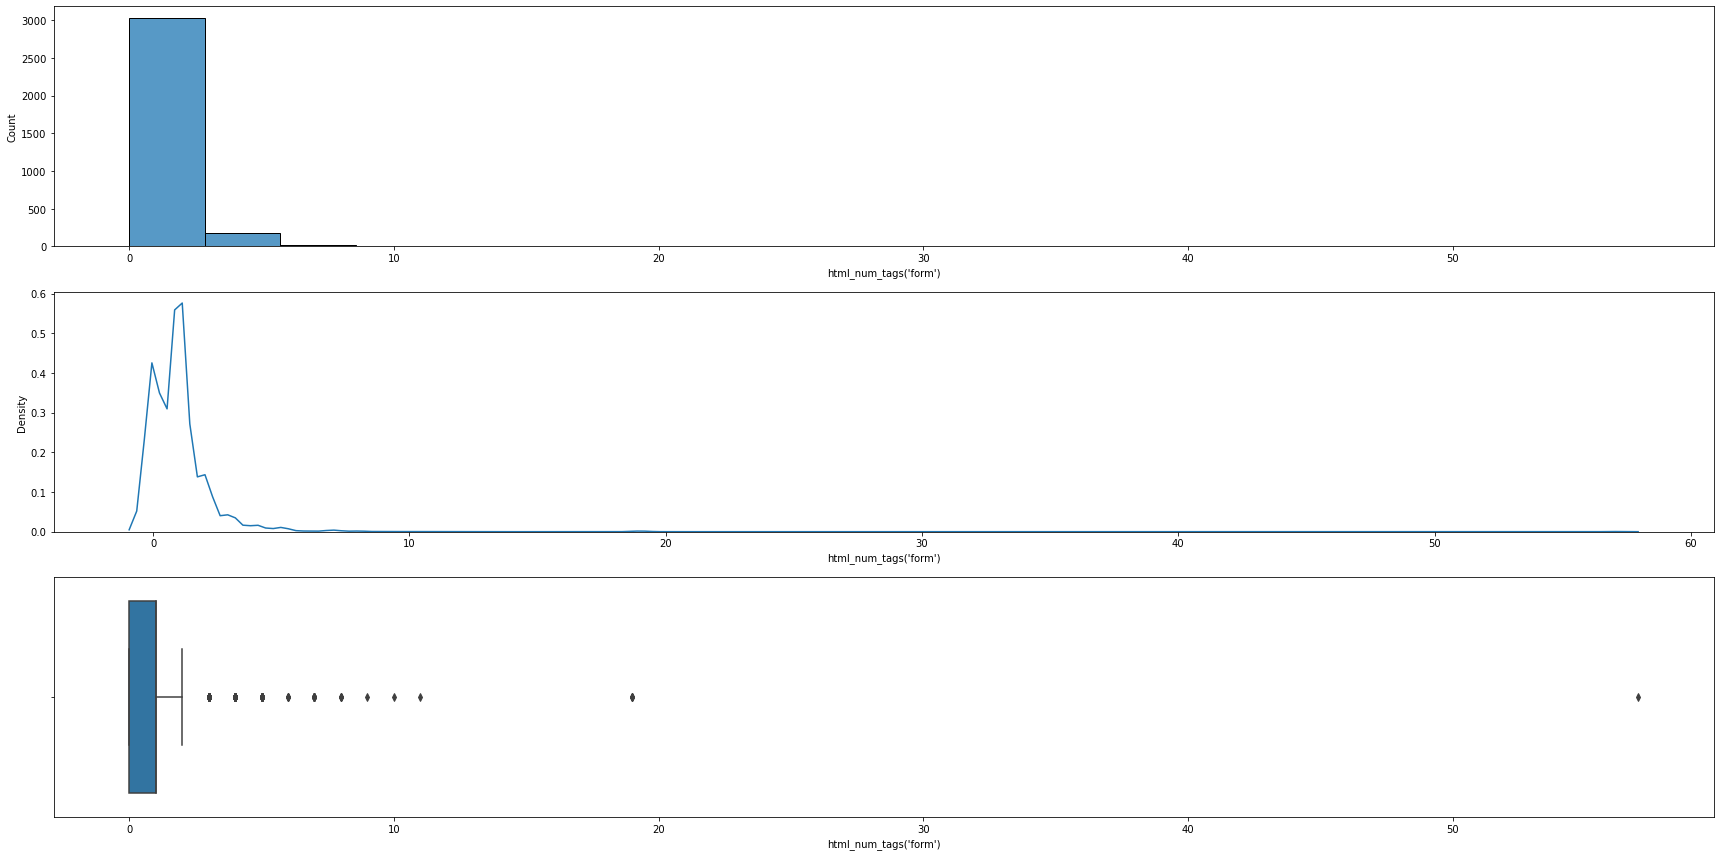

In [ ]:
var = "html_num_tags('form')"
plt.figure(figsize = (24,12))
plt.subplot(3,1,1)
sns.histplot(df[var], bins=20)

plt.subplot(3,1,2)
sns.kdeplot(df[var])

plt.subplot(3,1,3)
sns.boxplot(df[var])

plt.tight_layout()
plt.show()

In [ ]:
# 이상치 관련 행&열 삭제!

In [ ]:
df_out = df.copy()
df_out

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,1


In [ ]:
outlier_drop(df_out['url_len'])
df_out

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,1


In [ ]:
outlier_drop(df_out["html_num_tags('form')"])
df_out

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
5,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,3.943465,0.0,4.0,1.0,1.0,3.0,1.0,1.0,0.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,25.0,0.0,14.0,11.0,11.0,2.0,0.0,0.0,0.0,0.0,3.905639,0.0,14.0,0.0,0.0,36.0,1.0,1.0,0.0,41.0,1
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1


In [ ]:
outlier_drop(df_out["html_num_tags('head')"])
df_out

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
5,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,3.943465,0.0,4.0,1.0,1.0,3.0,1.0,1.0,0.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,25.0,0.0,14.0,11.0,11.0,2.0,0.0,0.0,0.0,0.0,3.905639,0.0,14.0,0.0,0.0,36.0,1.0,1.0,0.0,41.0,1
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1


In [ ]:
outlier_drop(df_out["url_port"])
df_out

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
5,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,3.943465,0.0,4.0,1.0,1.0,3.0,1.0,1.0,0.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,25.0,0.0,14.0,11.0,11.0,2.0,0.0,0.0,0.0,0.0,3.905639,0.0,14.0,0.0,0.0,36.0,1.0,1.0,0.0,41.0,1
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1


In [ ]:
outlier_drop(df_out["url_path_len"])
df_out

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
5,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,3.943465,0.0,4.0,1.0,1.0,3.0,1.0,1.0,0.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,25.0,0.0,14.0,11.0,11.0,2.0,0.0,0.0,0.0,0.0,3.905639,0.0,14.0,0.0,0.0,36.0,1.0,1.0,0.0,41.0,1
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1


In [ ]:
outlier_drop(df_out["url_num_dots"])
df_out

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
5,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,3.943465,0.0,4.0,1.0,1.0,3.0,1.0,1.0,0.0,18.0,1
6,49.0,0.0,30.0,19.0,19.0,4.0,0.0,0.0,0.0,0.0,4.251365,0.0,8.0,0.0,0.0,19.0,1.0,1.0,1.0,4.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,25.0,0.0,14.0,11.0,11.0,2.0,0.0,0.0,0.0,0.0,3.905639,0.0,14.0,0.0,0.0,36.0,1.0,1.0,0.0,41.0,1
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1


In [ ]:
# 두 종류의 데이터 셋으로 모델을 돌려보자! df(원본), df_out(이상치 제거)

In [ ]:
df_out.to_csv("preprocessed_train_dataset1.csv", mode="w")

In [ ]:
df.shape

(3233, 21)